Height of a is 4
4
2
5
3
10
15
0.5
0.3020708937557405
0.5871095615913723
0.270499307133503
0.3499461748900541
0.5389049955864258
0.9072101552719998
0.26434080615289757
0.03637675639579396
0.1772528085705366


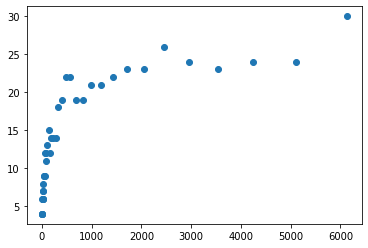

In [1]:

# Lab 6

# We'll define a node of a binary tree and introduce some features of Python
# classes along the way

import queue
import random

class BST:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def insert(self, value):
        '''
        node.insert(5) is the same as BST.insert(node, 5)
        We use this when recursively calling, e.g. self.left.insert
        '''
        if value < self.value:
            if self.left == None:
                self.left = BST(value)
            else:
                self.left.insert(value)
        else:
            if self.right == None:
                self.right = BST(value)
            else:
                self.right.insert(value)

    def __repr__(self):
        '''The string representation of a node.
        Here, we convert the value of the node to a string and make that
        the representation.
        We can now use
        a = Node(4)
        print(a) # prints 4
        '''
        return str(self.value)



a = BST(4)
a.insert(2)
a.insert(5)
a.insert(10)
a.insert(3)
a.insert(15)

# Problem 1
# Draw (manually) the binary tree rooted in a

    #       4
    #     /  \
    #    2    5
    #    \     \
    #     3    10
    #           \
    #           15


# Problem 2
# Write code to find the height of a Binary Search Tree

def tree_height(tree):
    '''
    tree is the BST class
    '''
    if tree is None:
        return 0
    
    return 1 + max(tree_height(tree.left), tree_height(tree.right))

print("Height of a is", tree_height(a))


# Problem 3

# Write code to print out the nodes of the BST using
# Breadth-First Search. How would you get the Breadth-First Traversal
# from the tree you've drawn?
# (Modify the BFS function from lecture for this problem)

def BFS_tree(node):
    queue = [node]
    while len(queue) > 0:
        node = queue.pop(0)
        print(node)
        if node.left != None:
            queue.append(node.left)
        if node.right != None:
            queue.append(node.right)  
        
###Run this to see a BFS traversal
BFS_tree(a)

# Problem 4

# Empirically investigate the relationship between the number of nodes in the
# tree and the height of the tree when inserting nodes with values generated
# using random.random()


# a = ["address", "apple", "cat", "a"]
# b = []
# for i in a:
#     if "a" in i: 
#         b.append(i)

# print(b)

# c = [i for i in a if "a" in i]
# print(c)
# random_numbers = [random.random() for _ in range(10)]
# print(random_numbers)

def make_random_tree(n_nodes):
    '''Make a tree with n_nodes nodes by inserting nodes with values
    drawn using random.random()
    '''
    random_numbers = [random.random() for _ in range(n_nodes - 1)]
    A = BST(0.5)
    
    for num in random_numbers:
        A.insert(num)
    return A

BFS_tree(make_random_tree(10))

def height_random_tree(n_nodes):
    '''Generate a random tree with n_nodes nodes, and return its height'''
    return tree_height(make_random_tree(n_nodes))

def make_data(max_nodes):
    '''Make two lists representing the empirical relationship between
    the number of nodes in a random tree and the height of the tree.
    Generate N_TREES = 40 trees with each of
    n_nodes = 5, int(1.2*5), int(1.2^2*5), .....

    return n (a list of values of n_nodes) and h (a list of heights)

    '''
    from numpy import power

    N_TREES = 40
    n_nodes = 5

    
    n = [int(5*power(1.2,n)) for n in range(40)]
    
    h = list(map(height_random_tree, n))

    return n, h

n, h = make_data(1000)
import matplotlib.pyplot as plt
plt.scatter(n, h)
plt.show()
# plt.savefig("trees.png") can save the data to disk

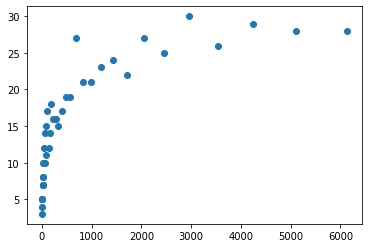

In [2]:
n, h = make_data(60)
import matplotlib.pyplot as plt
plt.scatter(n, h)
plt.show()